#### Load the dataset 

In [1]:
import pandas as pd
df = pd.read_json (r'D:\New folder (2)\posts\mypost.json')
df.head()

,timestamp,data,title,attachments,tags
0,2021-01-02 14:15:01,"[{'post': 'In Bangladesh, most of the girls co...",Ta-seen Reaz Niloy updated her status.,NaN,NaN
1,2020-12-31 18:21:42,[{'post': 'Though Sometimes we have to survive...,Ta-seen Reaz Niloy updated her status.,NaN,NaN
2,2020-12-31 10:14:09,[{'post': 'Happy Birthday pappa â¤ï¸'}],Ta-seen Reaz Niloy added a new photo to Begum ...,[{'data': [{'media': {'uri': 'photos_and_video...,NaN
3,2020-12-30 15:06:25,[{'post': 'Happy Birthday'}],Ta-seen Reaz Niloy wrote on Ayesha Moon's time...,NaN,NaN
4,2020-12-30 15:06:20,[{'post': 'Happy Birthday â¤ï¸'}],Ta-seen Reaz Niloy wrote on Labonee Rahman's t...,NaN,NaN


In [3]:
df.shape

(3357, 5)

In [5]:
transform_data= df.copy()

In [6]:
transform_data.isnull().sum() 

timestamp         0
data            453
title           929
attachments    1734
tags           2599
dtype: int64

#### Clean the dataset 

In [7]:
transform_data= transform_data.dropna()

In [8]:
transform_data.isnull().sum()

timestamp      0
data           0
title          0
attachments    0
tags           0
dtype: int64

In [9]:
transform_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 57 to 3299
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    112 non-null    datetime64[ns]
 1   data         112 non-null    object        
 2   title        112 non-null    object        
 3   attachments  112 non-null    object        
 4   tags         112 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ KB


In [10]:
# rename the timestamp column
transform_data.rename(columns={'timestamp': 'date'}, inplace=True)

#drop some unnecessary columns
transform_data = transform_data.drop(['attachments', 'title', 'tags'], axis=1)

# making sure it's datetime format
pd.to_datetime(transform_data['date'])

transform_data.head(3)

,date,data
57,2020-11-30 21:12:12,[{'post': 'Happy Birthday apu. May the Almight...
84,2020-11-11 16:54:25,[{'post': 'BBQ party with School buddies <3 #L...
154,2020-10-09 14:25:18,[{'post': 'After almost 2.5 years later I met ...


#### Figuring out Monthly Post Count

In [11]:
transform_data = transform_data.set_index('date')
post_counts = transform_data['data'].resample('MS').size()
post_counts

date
2015-07-01    1
2015-08-01    0
2015-09-01    0
2015-10-01    0
2015-11-01    0
             ..
2020-07-01    0
2020-08-01    2
2020-09-01    1
2020-10-01    3
2020-11-01    2
Freq: MS, Name: data, Length: 65, dtype: int64

In [12]:
post_counts.head(10)

date
2015-07-01    1
2015-08-01    0
2015-09-01    0
2015-10-01    0
2015-11-01    0
2015-12-01    1
2016-01-01    0
2016-02-01    2
2016-03-01    1
2016-04-01    3
Freq: MS, Name: data, dtype: int64

#### Visualize my Facebook Usage

Since 2018, I have been focusing on research and development, and since then I've slightly stopped using Facebook.
In the second graph (Word Cloud Visualization) I have shown what kind of keywords I used the most in my Facebook posts.

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


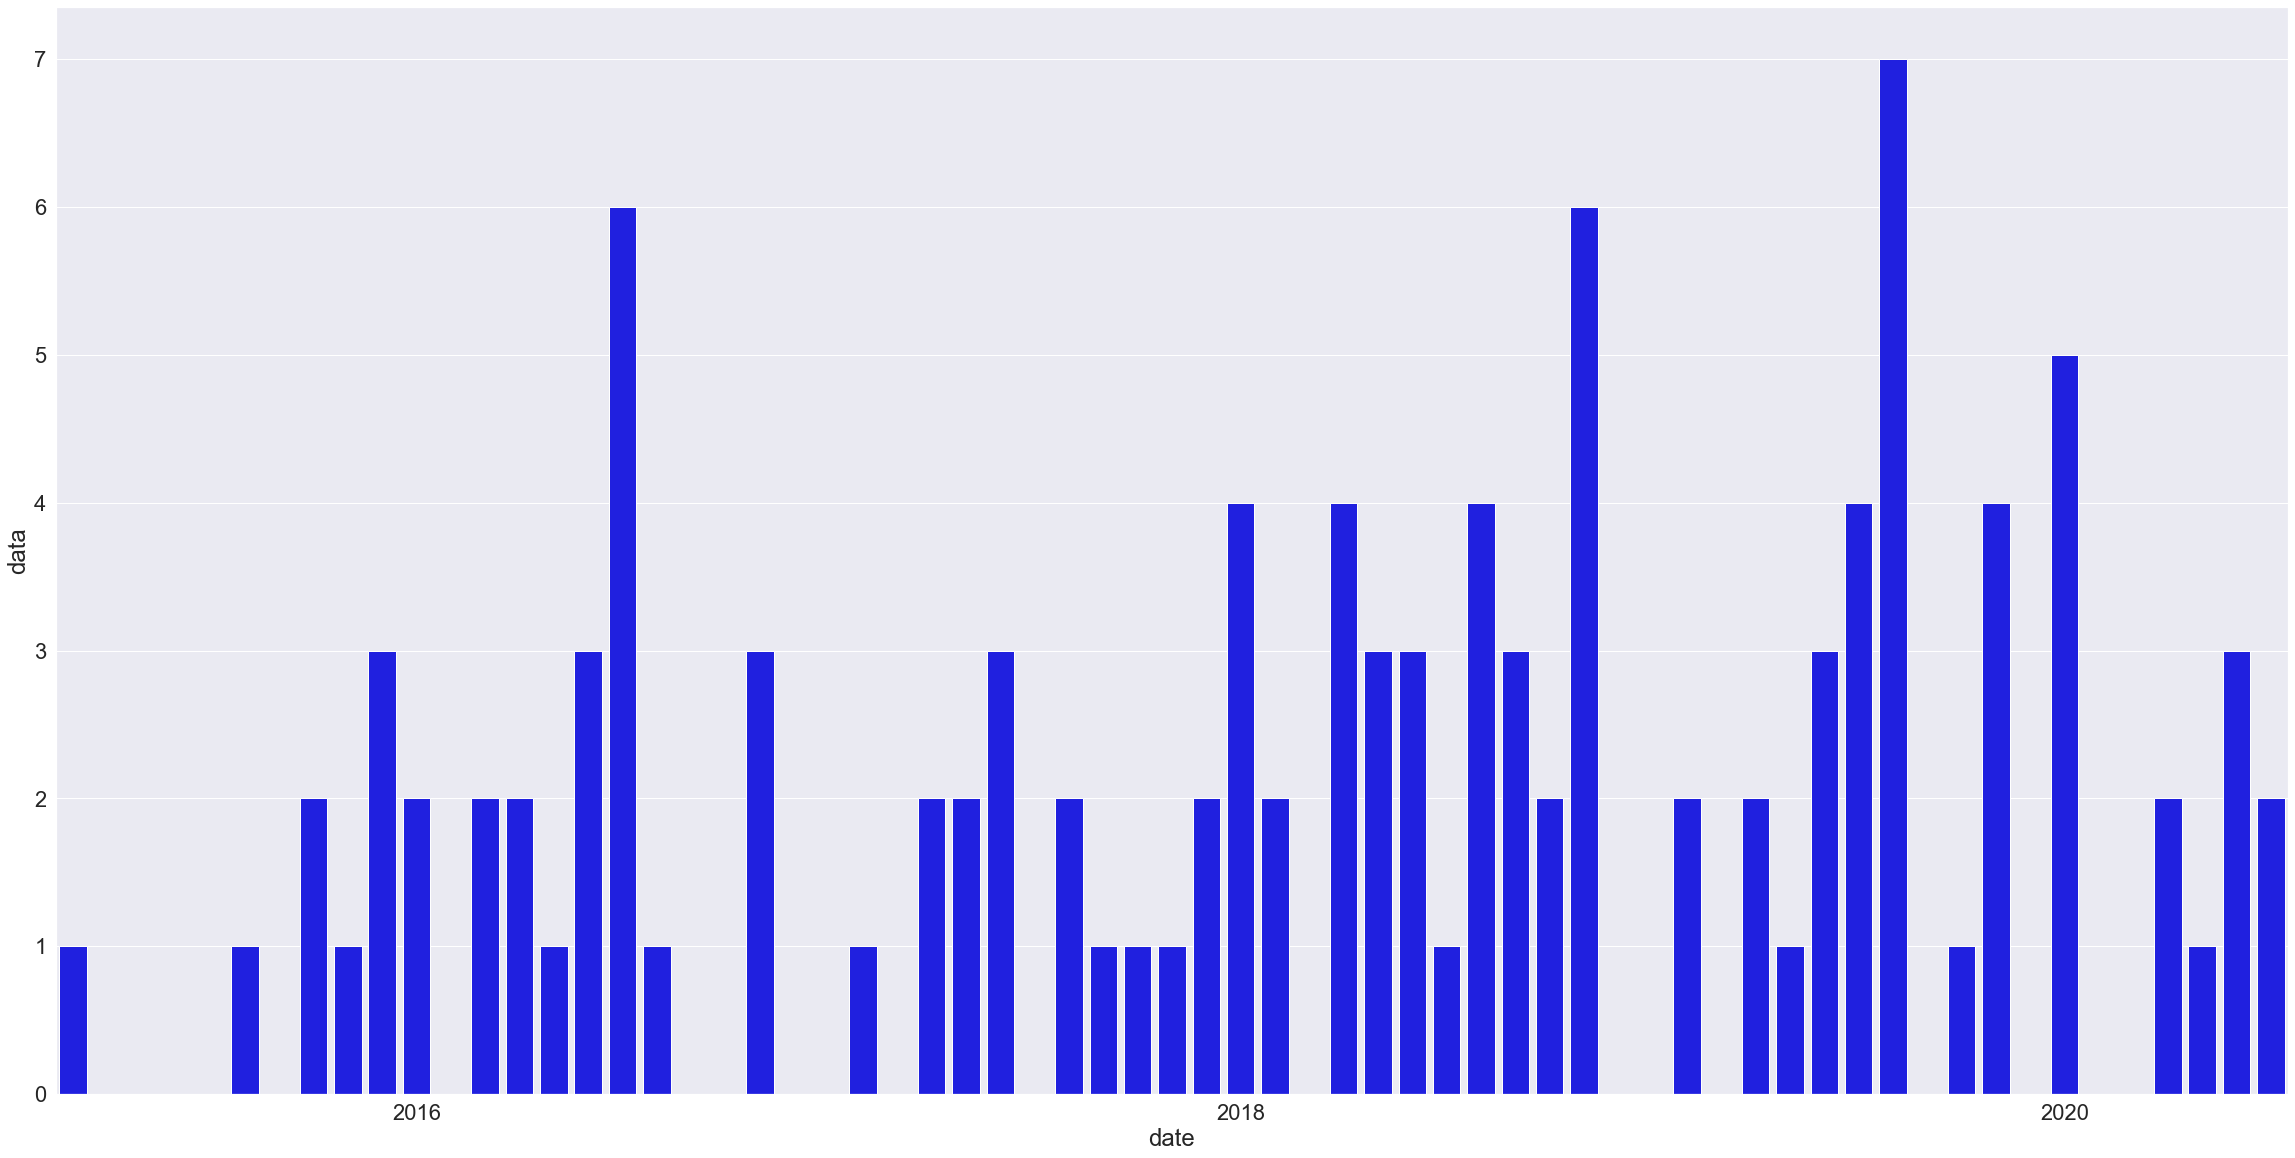

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# set figure size and font size
sns.set(rc={'figure.figsize':(40,20)})
sns.set(font_scale=2)

# set x labels
x_labels = post_counts.index

#create bar plot
sns.barplot(x_labels, post_counts, color="blue")

# only show x-axis labels for Jan 1 of every other year
tick_positions = np.arange(10, len(x_labels), step=24)

#reformat date to display year onlyplt.ylabel("post counts")
plt.xticks(tick_positions, x_labels[tick_positions].strftime("%Y"))

# display the plot
plt.show()

#### Word Cloud Visualization 

In [19]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


Word cloud visualization is usefull for visualizing the typical words that appears most in the Facebook Post 

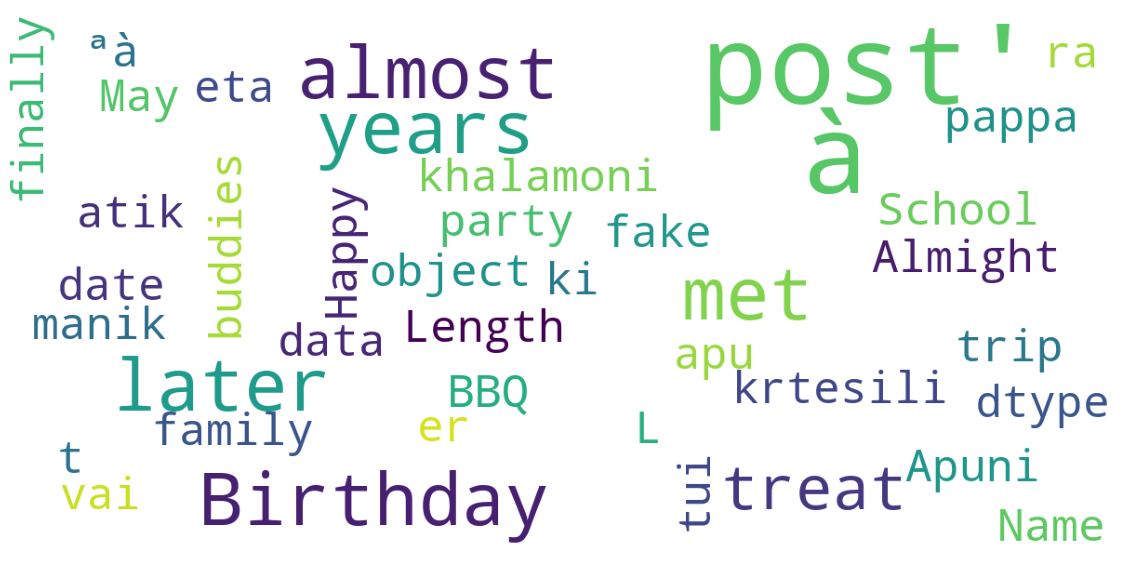

In [21]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(transform_data["data"])

In [13]:
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")

In [17]:
transform_data.head()

,data
date,
2019-11-20 14:54:42,[{'post': '#Loved this place. #Victoria_memor...
2019-11-17 13:38:31,[{'post': 'Nice view of SSET Campus.'}]
2019-04-02 10:40:04,[{'post': 'à¦¸à§à¦¬à¦ªà§à¦¨ à¦à§à¦²à§ à¦ª...
2019-01-23 17:37:21,[{'post': 'à¦¬à¦¾à¦à¦²à¦¾à¦¦à§à¦¶ à¦à¦° à¦ª...
2019-01-10 17:38:44,[{'post': 'Happy birthday dada <3 <3 May alla...
